#Example of MISO forecasting with Auto-TSF

In [1]:
!pip install --quiet git+https://github.com/PatriciaLucas/AutoML.git

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.6/309.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 7.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
from AUTODCETS import autodcets, datasets, save_database as sd, measures
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

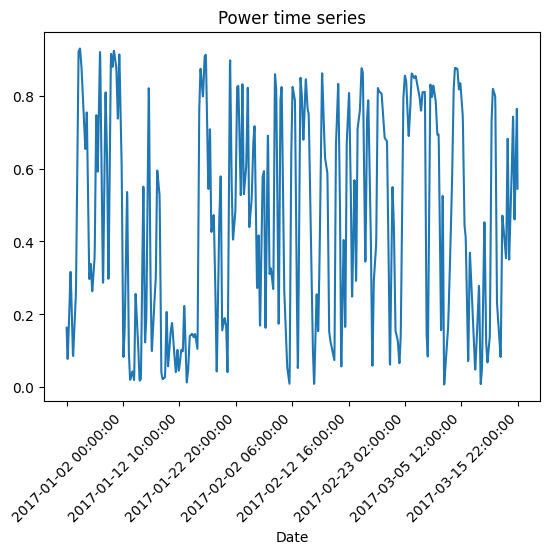

In [3]:
name_dataset = 'ENERGY_1'
target = 'Power'
data = pd.DataFrame(datasets.get_multivariate(name_dataset))
data = data.head(2000)
data[target].plot(rot=45, title="Power time series")
pass

In [4]:
train, test = data.head(int(data.shape[0]-30)), data.tail(30)

In [5]:
model = autodcets.AUTODCETS(params_MEOHP = {'npop': 20,'ngen': 10,'size_train': 200,'size_test': 50},
                 feature_selection = True,
                 distributive_version = True,
                 save_model = True,
                 path_model = 'model',
                 decomposition = True,
                 max_lags = 20,
                 test_size = 0,
                 optimize_hiperparams = True)
model.fit(train, target)

Start time: 2025-01-30 16:07:22.882091

FEATURE EXTRACTION LAYER - DECOMPOSITION
FEATURE SELECTION LAYER - CAUSAL
THE CAUSAL GRAPH CONTAINS THE FOLLOWING VARIABLES: ['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m', 'IMF1', 'IMF2', 'IMF3', 'IMF4', 'IMF5', 'IMF6']
MODEL SELECTION LAYER
HPO started...


Processing: 100%|██████████| 10/10 [06:45<00:00, 40.55s/it]


Run time: 0:10:23.893236


In [ ]:
forecast = model.predict_ahead(step_ahead=30)
real = test[target].values.tolist()

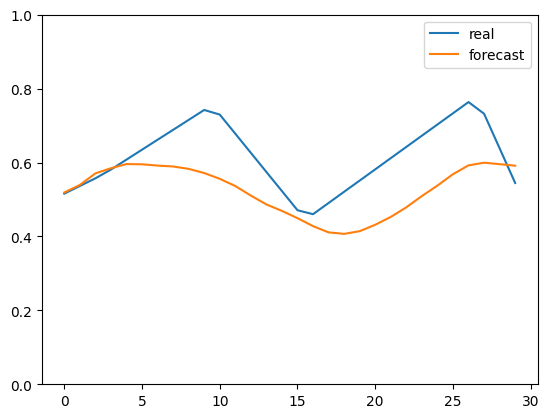

In [ ]:
import matplotlib.pyplot as plt
real_old_1 = pd.concat([train[target].head(500), test[target]], ignore_index=True).values
plt.plot(test[target].values, label='real')
plt.plot(forecast.values, label='forecast')
plt.ylim([0, 1])
plt.legend()
plt.show()

##Accessing the causal graph of variables

In [ ]:
model.G_list['temperature_2m']

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m
1,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False


##Accessing models and variable hyperparameters

In [ ]:
model.dict_variables['temperature_2m']['hiperparam']

{'model': 'XGBoost',
 'n_estimators': 57,
 'min_samples_leaf': 16,
 'max_features': 0.2,
 'factorial_cost': {'temperature_2m': 0.16514265914231352,
  'relativehumidity_2m': 0.15698393808264163,
  'dewpoint_2m': 0.0912609824310595,
  'windspeed_10m': 0.22230855421993256,
  'windspeed_100m': 0.17903697066089463,
  'winddirection_10m': 0.28374829215557007,
  'winddirection_100m': 0.27052416977191923,
  'windgusts_10m': 0.7294775705157877,
  'IMF1': 0.11585272949974056,
  'IMF2': 0.1324106451824807,
  'IMF3': 0.16302723557962473,
  'IMF4': 1.7829062955539725,
  'IMF5': 8.966059282674124,
  'IMF6': 0.44770401067652543},
 'factorial_rank': {'temperature_2m': 6.0,
  'relativehumidity_2m': 5.0,
  'dewpoint_2m': 3.0,
  'windspeed_10m': 4.0,
  'windspeed_100m': 8.0,
  'winddirection_10m': 8.0,
  'winddirection_100m': 10.0,
  'windgusts_10m': 5.0,
  'IMF1': 15.0,
  'IMF2': 29.0,
  'IMF3': 28.0,
  'IMF4': 18.0,
  'IMF5': 25.0,
  'IMF6': 10.0},
 'factorial_skill': 'IMF3',
 'scalar_fitness': 0.33333